In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from keras.optimizers import Adam
# from keras.callbacks import ModelCheckpoint
# from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from skimage import io
import cv2
#from utils import INPUT_SHAPE, batch_generator
import matplotlib.pyplot as plt
import argparse
import os



C:\Users\Rudresh\anaconda3\envs\Autocar\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Datadir = 'C:/Users/vtshu/Downloads/simulator-windows-64'
#C:\Users\vtshu\Downloads\simulator-windows-64 (1)
#Datadir = r'C:\Users\vtshu\Downloads\simulator-windows-64 (1)'
Datadir = r'C:\Users\Rudresh\Downloads\Autocar\Rudresh_driving_log' #Rudresh-laptop

data_df = pd.read_csv(os.path.join(Datadir, 'driving_log.csv'), names=['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed'])

In [3]:
data_df


center  \
0     C:\Users\Rudresh\Downloads\simulator-windows-6...   
1     C:\Users\Rudresh\Downloads\simulator-windows-6...   
2     C:\Users\Rudresh\Downloads\simulator-windows-6...   
3     C:\Users\Rudresh\Downloads\simulator-windows-6...   
4     C:\Users\Rudresh\Downloads\simulator-windows-6...   
...                                                 ...   
3096  C:\Users\Rudresh\Downloads\simulator-windows-6...   
3097  C:\Users\Rudresh\Downloads\simulator-windows-6...   
3098  C:\Users\Rudresh\Downloads\simulator-windows-6...   
3099  C:\Users\Rudresh\Downloads\simulator-windows-6...   
3100  C:\Users\Rudresh\Downloads\simulator-windows-6...   

                                                   left  \
0      C:\Users\Rudresh\Downloads\simulator-windows-...   
1      C:\Users\Rudresh\Downloads\simulator-windows-...   
2      C:\Users\Rudresh\Downloads\simulator-windows-...   
3      C:\Users\Rudresh\Downloads\simulator-windows-...   
4      C:\Users\Rudresh\Downloads\simulator-windows-...   
...                                                 ...   
3096   C:\Users\Rudresh\Downloads\simulator-windows-...   
3097   C:\Users\Rudresh\Downloads\simulator-windows-...   
3098   C:\Users\Rudresh\Downloads\simulator-windows-...   
3099   C:\Users\Rudresh\Downloads\simulator-windows-...   
3100   C:\Users\Rudresh\Downloads\simulator-windows-...   

                                                  right  steering  throttle  \
0      C:\Users\Rudresh\Downloads\simulator-windows-...       0.0       0.0   
1      C:\Users\Rudresh\Downloads\simulator-windows-...       0.0       0.0   
2      C:\Users\Rudresh\Downloads\simulator-windows-...       0.0       0.0   
3      C:\Users\Rudresh\Downloads\simulator-windows-...       0.0       0.0   
4      C:\Users\Rudresh\Downloads\simulator-windows-...       0.0       0.0   
...                                                 ...       ...       ...   
3096   C:\Users\Rudresh\Downloads\simulator-windows-...       0.0       0.0   
3097   C:\Users\Rudresh\Downloads\simulator-windows-...       0.0       0.0   
3098   C:\Users\Rudresh\Downloads\simulator-windows-...       0.0       0.0   
3099   C:\Users\Rudresh\Downloads\simulator-windows-...       0.0       0.0   
3100   C:\Users\Rudresh\Downloads\simulator-windows-...       0.0       0.0   

      reverse      speed  
0           0   6.979136  
1           0   6.908142  
2           0   6.823891  
3           0   6.740652  
4           0   6.672053  
...       ...        ...  
3096        0  15.362710  
3097        0  15.737150  
3098        0  15.553660  
3099        0  14.823750  
3100        0  14.647460  

[3101 rows x 7 columns]

In [4]:
data_df['steering']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3096    0.0
3097    0.0
3098    0.0
3099    0.0
3100    0.0
Name: steering, Length: 3101, dtype: float64

In [5]:
data_df['steering'] = np.exp(data_df['steering'])

In [6]:
data_df['steering']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3096    1.0
3097    1.0
3098    1.0
3099    1.0
3100    1.0
Name: steering, Length: 3101, dtype: float64

In [7]:
#data_df = data_df[0:1000]
#data_df[data_df['steering']!=0]
#data_df['steering'] = np.log(data_df['steering'])

In [8]:
data_df['steering']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3096    1.0
3097    1.0
3098    1.0
3099    1.0
3100    1.0
Name: steering, Length: 3101, dtype: float64

In [9]:
#data_df=data_df[data_df['steering']!=0]

In [10]:
#data_df['steering']=50

In [11]:
##data_df

C:\Users\Rudresh\Downloads\simulator-windows-64 (1)\Default Windows desktop 64-bit_Data\IMG\center_2022_10_19_21_19_42_739.jpg
(160, 320, 3)


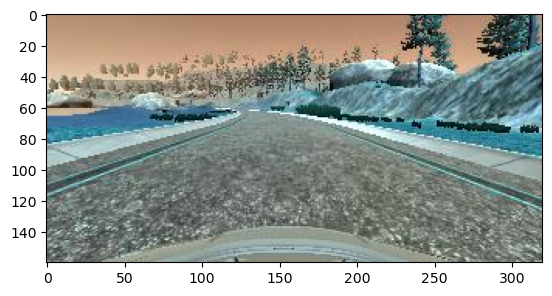

 C:\Users\Rudresh\Downloads\simulator-windows-64 (1)\Default Windows desktop 64-bit_Data\IMG\left_2022_10_19_21_19_42_739.jpg
(160, 320, 3)


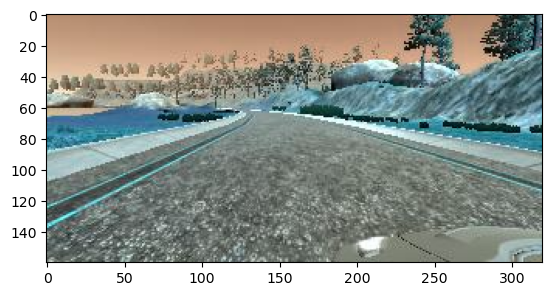

 C:\Users\Rudresh\Downloads\simulator-windows-64 (1)\Default Windows desktop 64-bit_Data\IMG\right_2022_10_19_21_19_42_739.jpg
(160, 320, 3)


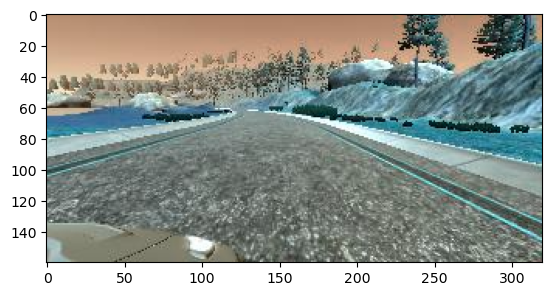

In [12]:
X = data_df[['center', 'left', 'right']].values
    #and our steering commands as our output data
y = data_df['steering'].values

    #now we can split the data into a training (80), testing(20), and validation set
    #thanks scikit learn
X_train_path, X_test_path, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


for i in range(3):    
    ex = X_train_path[0][i]
    print(ex)
    out = cv2.imread(ex.strip())
    print(out.shape)
    plt.imshow(out)
    plt.show()



In [13]:
y_train

array([1.        , 1.        , 1.        , ..., 0.73939877, 0.99709602,
       1.        ])

In [14]:
y.shape

(3101,)

In [15]:
# def convert_data(Dataset):
#     numset = []
#     for i in range(Dataset.shape[0]):
#         path_list = []
#         for j in Dataset[i]:           
            
#             img = cv2.imread(j)
#             #print(f'image shape {img.shape}')
#             path_list.append(img)           
# #             break
#         numset.append(path_list)
#     return numset
# #         break
# X_train = convert_data(X_train_path)
# X_test = convert_data(X_test_path)

# # print(np.shape(np.array(training_data)))
# # print(len(y))
# print(np.shape(np.array(X_train[0][0])))        
# print(np.shape(np.array(X_train))) 
# print(np.shape(np.array(X_test))) 
# print(np.shape(np.array(y_train))) 
# print(np.shape(np.array(y_test))) 
# X_train = np.array(X_train).reshape(-1,3,160,320)
# X_test = np.array(X_test).reshape(-1,3,160)
    

In [16]:
import cv2, os
import numpy as np
import matplotlib.image as mpimg
from sqlalchemy import true

IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = 66,200, 3
INPUT_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)

def load_image(data_dir, image_file):
    """
    Load RGB images from a file
    """
    return mpimg.imread(os.path.join(data_dir, image_file.strip()))


def crop(image):
    """
    Crop the image (removing the sky at the top and the car front at the bottom)
    """
    return image[60:-25, :, :] # remove the sky and the car front


def resize(image):
    """
    Resize the image to the input shape used by the network model
    """
    return cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT), cv2.INTER_AREA)


def rgb2yuv(image):
    """
    Convert the image from RGB to YUV (This is what the NVIDIA model does)
    """
    return cv2.cvtColor(image, cv2.COLOR_RGB2YUV)


def preprocess(image):
    """
    Combine all preprocess functions into one
    """
    image = crop(image)
    image = resize(image)
    image = rgb2yuv(image)
    return image


def choose_image(data_dir, center, left, right, steering_angle):
    """
    Randomly choose an image from the center, left or right, and adjust
    the steering angle.
    """
    choice = np.random.choice(3)
    if choice == 0:
        return load_image(data_dir, left), steering_angle + 0.2
    elif choice == 1:
        return load_image(data_dir, right), steering_angle - 0.2
    return load_image(data_dir, center), steering_angle


def random_flip(image, steering_angle):
    """
    Randomly flipt the image left <-> right, and adjust the steering angle.
    """
    if np.random.rand() < 0.5:
        image = cv2.flip(image, 1)
        steering_angle = -steering_angle
    return image, steering_angle


def random_translate(image, steering_angle, range_x, range_y):
    """
    Randomly shift the image virtially and horizontally (translation).
    """
    trans_x = range_x * (np.random.rand() - 0.5)
    trans_y = range_y * (np.random.rand() - 0.5)
    steering_angle += trans_x * 0.002
    trans_m = np.float32([[1, 0, trans_x], [0, 1, trans_y]])
    height, width = image.shape[:2]
    image = cv2.warpAffine(image, trans_m, (width, height))
    return image, steering_angle


def random_shadow(image):
    """
    Generates and adds random shadow
    """
    # (x1, y1) and (x2, y2) forms a line
    # xm, ym gives all the locations of the image
    x1, y1 = IMAGE_WIDTH * np.random.rand(), 0
    x2, y2 = IMAGE_WIDTH * np.random.rand(), IMAGE_HEIGHT
    xm, ym = np.mgrid[0:IMAGE_HEIGHT, 0:IMAGE_WIDTH]

    # mathematically speaking, we want to set 1 below the line and zero otherwise
    # Our coordinate is up side down.  So, the above the line: 
    # (ym-y1)/(xm-x1) > (y2-y1)/(x2-x1)
    # as x2 == x1 causes zero-division problem, we'll write it in the below form:
    # (ym-y1)*(x2-x1) - (y2-y1)*(xm-x1) > 0
    image=preprocess(image)
    mask = np.zeros_like(image[:, :, 1])
    mask[(ym - y1) * (x2 - x1) - (y2 - y1) * (xm - x1) > 0] = 1

    # choose which side should have shadow and adjust saturation
    cond = mask == np.random.randint(2)
    s_ratio = np.random.uniform(low=0.2, high=0.5)

    # adjust Saturation in HLS(Hue, Light, Saturation)
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    hls[:, :, 1][cond] = hls[:, :, 1][cond] * s_ratio
    return cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)


def random_brightness(image):
    """
    Randomly adjust brightness of the image.
    """
    # HSV (Hue, Saturation, Value) is also called HSB ('B' for Brightness).
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    ratio = 1.0 + 0.4 * (np.random.rand() - 0.5)
    hsv[:,:,2] =  hsv[:,:,2] * ratio
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)


def augument(data_dir, center, left, right, steering_angle, range_x=100, range_y=10):
    """
    Generate an augumented image and adjust steering angle.
    (The steering angle is associated with the center image)
    """
    image, steering_angle = choose_image(data_dir, center, left, right, steering_angle)
    image, steering_angle = random_flip(image, steering_angle)
    image, steering_angle = random_translate(image, steering_angle, range_x, range_y)
    #image = random_shadow(image)
    image = random_brightness(image)
    return image, steering_angle


def batch_generator2(data_dir, image_paths, steering_angles, batch_size, is_training):
    print('Hey')
    images = np.empty([batch_size, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS])
    steers = np.empty(batch_size)
    while True:
        i = 0
        for index in np.random.permutation(image_paths.shape[0]):
            center, left, right = image_paths[index]
            steering_angle = steering_angles[index]
            # argumentation
            if is_training and np.random.rand() < 0.6:
                image, steering_angle = augument(data_dir, center, left, right, steering_angle)
            else:
                image = load_image(data_dir, center) 
            # add the image and steering angle to the batch
            images[i] = preprocess(image)
            steers[i] = steering_angle
            i += 1
            if i == batch_size:
                break
        return images, steers
    
    
    



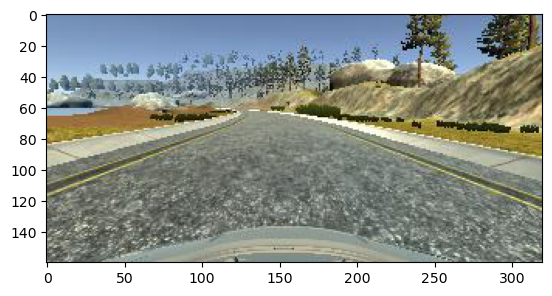

In [17]:
plt.imshow(mpimg.imread(X_train_path[0][0]))

In [18]:
X_train_path[0][0]

'C:\\Users\\Rudresh\\Downloads\\simulator-windows-64 (1)\\Default Windows desktop 64-bit_Data\\IMG\\center_2022_10_19_21_19_42_739.jpg'

In [19]:
X_train,y_train = batch_generator2(Datadir, X_train_path, y_train,X_train_path.shape[0] , True)#

Hey


In [20]:
X_test,y_test = batch_generator2(Datadir, X_test_path, y_test, X_test_path.shape[0], False)

Hey


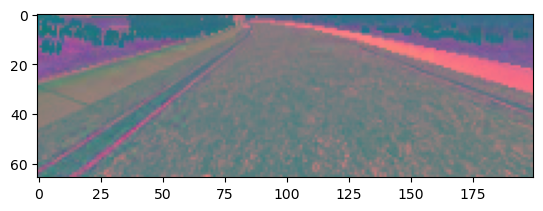

In [21]:
plt.imshow(X_train[15]/255)

In [22]:
X_train.shape

(2480, 66, 200, 3)

In [23]:
X_test.shape

(621, 66, 200, 3)

In [24]:
#pleaseeeeeeeeeeeeeeeee note that u have made x/127.5-1.0 here

X_train = np.array(X_train).reshape(-1,3,IMAGE_HEIGHT,IMAGE_WIDTH)
X_test = np.array(X_test).reshape(-1,3,IMAGE_HEIGHT,IMAGE_WIDTH)
X_train = np.array(X_train)/127.5-1.0
X_test= np.array(X_test)/127.5-1.0  

In [25]:
X_train.shape

(2480, 3, 66, 200)

In [26]:
X_test.shape

(621, 3, 66, 200)

In [27]:
y_train

array([ 1.        , -0.78860689,  1.        , ...,  1.        ,
       -1.29366224,  1.        ])

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torchvision.transforms as transforms

In [29]:
class Autocar_data(Dataset):
    def __init__(self,x,y,transforms = None):
        self.X = x
        self.Y = y
        self.transforms = transforms
        
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self,index):
        x = torch.tensor(self.X[index,:,:])
        y = torch.tensor(self.Y[index])
        
        return x,y

In [30]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#in_channels = 3
#out_channels = 2
learning_rate = 0.001
batch_size = 64
num_epochs = 100

In [31]:
train_set = Autocar_data(X_train, y_train)
test_set = Autocar_data(X_test,y_test)

train_loader = DataLoader(train_set, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_set, batch_size= batch_size*4,shuffle = True) ## batch_size*30 so it tests in one epoch


In [32]:
y_test

array([1.        , 1.        , 1.        , 0.89680772, 0.36787944,
       1.        , 1.        , 1.1021459 , 0.93097935, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.89583028, 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.93376944, 1.        , 1.        ,
       1.03323306, 1.        , 1.        , 1.        , 1.        ,
       0.94829485, 0.80117226, 0.88196536, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.720715  , 1.        , 1.        , 1.        , 1.01198303,
       1.        , 1.        , 1.        , 1.        , 0.93507102,
       1.        , 0.67611426, 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.63101465, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.78930213, 1.        , 0.96304475, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [33]:
class CNN(nn.Module):
    def __init__(self,in_channels=3,num_classes=1):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=24,kernel_size=(5,5),stride=(2,2))
        self.conv2 = nn.Conv2d(in_channels=24,out_channels=36,kernel_size=(5,5),stride=(2,2))
        self.conv3 = nn.Conv2d(in_channels=36,out_channels=48,kernel_size=(5,5),stride=(2,2))
        self.conv4 = nn.Conv2d(in_channels=48,out_channels=64,kernel_size=(3,3))
        self.conv5 = nn.Conv2d(in_channels=64,out_channels=64,kernel_size=(3,3))
        #self.pool = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
        #[(W−K+2P)/S]+1       
        self.fc1 = nn.Linear(64*1*18, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 10)
        self.fc4 = nn.Linear(10, 1)
        
        
    def forward(self,x):
        x = F.elu(self.conv1(x.float()))
        x = F.elu(self.conv2(x))
        x = F.elu(self.conv3(x))
        x = F.elu(self.conv4(x))
        x = F.elu(self.conv5(x))
              
        x = x.reshape(x.shape[0],-1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        
        return x
    
model = CNN()
x = torch.rand(64,3,66,200)
print(model(x).shape)

torch.Size([64, 1])


In [34]:
# class CNN(nn.Module):
#     def __init__(self,in_channels=3,num_classes=1):
#         super(CNN,self).__init__()
#         self.conv1 = nn.Conv2d(in_channels=3,out_channels=24,kernel_size=(5,5),padding=(1,2))
#         self.conv2 = nn.Conv2d(in_channels=24,out_channels=36,kernel_size=(5,5),padding=(0,0))#,padding=(1,0))
#         self.conv3 = nn.Conv2d(in_channels=36,out_channels=48,kernel_size=(5,5),padding=(0,0))
#         self.conv4 = nn.Conv2d(in_channels=48,out_channels=64,kernel_size=(3,3))
#         self.conv5 = nn.Conv2d(in_channels=64,out_channels=64,kernel_size=(3,3))
#         self.pool = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
#         #[(W−K+2P)/S]+1       
#         self.fc1 = nn.Linear(64*1*18, 100)
#         self.fc2 = nn.Linear(100, 50)
#         self.fc3 = nn.Linear(50, 10)
#         self.fc4 = nn.Linear(10, 1)
        
        
#     def forward(self,x):
#         x = F.elu(self.conv1(x.float()))
#         #print(f'1st {x.shape}')
#         x = self.pool(x)
#         #print(f'2nd pool {x.shape}')
#         x = F.elu(self.conv2(x))
#         #print(f'3rd {x.shape}')
#         x = self.pool(x)
#         #print(f'4th pool {x.shape}')
#         x = F.elu(self.conv3(x))
#         #print(f'5th {x.shape}')
#         x = self.pool(x)
#         #print(f'6th pool {x.shape}')
#         x = F.elu(self.conv4(x))
#         #print(f'7th {x.shape}')
#         x = F.elu(self.conv5(x))
#         #print(f'8th {x.shape}')
              
#         x = x.reshape(x.shape[0],-1)
#         #print(f'9th {x.shape}')
#         x = self.fc1(x)
#         x = self.fc2(x)
#         x = self.fc3(x)
#         x = self.fc4(x)
        
#         return x
    
# model = CNN()
# x = torch.rand(64,3,66,200)
# print(model(x).shape)

In [35]:
model = CNN().to(device=device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr = learning_rate)

In [36]:
from torchvision import models
from torchsummary import summary

# vgg = models.CNN()
summary(model, (3, 66, 200))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 24, 31, 98]          1,824
├─Conv2d: 1-2                            [-1, 36, 14, 47]          21,636
├─Conv2d: 1-3                            [-1, 48, 5, 22]           43,248
├─Conv2d: 1-4                            [-1, 64, 3, 20]           27,712
├─Conv2d: 1-5                            [-1, 64, 1, 18]           36,928
├─Linear: 1-6                            [-1, 100]                 115,300
├─Linear: 1-7                            [-1, 50]                  5,050
├─Linear: 1-8                            [-1, 10]                  510
├─Linear: 1-9                            [-1, 1]                   11
Total params: 252,219
Trainable params: 252,219
Non-trainable params: 0
Total mult-adds (M): 26.88
Input size (MB): 0.15
Forward/backward pass size (MB): 0.82
Params size (MB): 0.96
Estimated Total Size (MB): 1.93


Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 24, 31, 98]          1,824
├─Conv2d: 1-2                            [-1, 36, 14, 47]          21,636
├─Conv2d: 1-3                            [-1, 48, 5, 22]           43,248
├─Conv2d: 1-4                            [-1, 64, 3, 20]           27,712
├─Conv2d: 1-5                            [-1, 64, 1, 18]           36,928
├─Linear: 1-6                            [-1, 100]                 115,300
├─Linear: 1-7                            [-1, 50]                  5,050
├─Linear: 1-8                            [-1, 10]                  510
├─Linear: 1-9                            [-1, 1]                   11
Total params: 252,219
Trainable params: 252,219
Non-trainable params: 0
Total mult-adds (M): 26.88
Input size (MB): 0.15
Forward/backward pass size (MB): 0.82
Params size (MB): 0.96
Estimated Total Size (MB): 1.93

In [37]:
#             Conv2d-1           [-1, 24, 31, 98]           1,824
#             Conv2d-2           [-1, 36, 14, 47]          21,636
#             Conv2d-3            [-1, 48, 5, 22]          43,248
#             Conv2d-4            [-1, 64, 3, 20]          27,712
#             Conv2d-5            [-1, 64, 1, 18]          36,928
#             Linear-6                  [-1, 100]         115,300
#             Linear-7                   [-1, 50]           5,050
#             Linear-8                   [-1, 10]             510
#             Linear-9                    [-1, 1]              11

In [43]:
for epoch in range(num_epochs):
    #print(f'current epoch number: {epoch}')
    correct = 0
    train_loss = 0.0
    for batch_idx, (data,targets) in enumerate(train_loader):
        data = data.to(device = device)
        targets = targets.to(device = device).float()
        scores = model(data).reshape(-1) #Forward pass
        #print(f'targets{targets.shape}')
        #print(f'scores {scores.shape}')
        loss = criterion(scores,targets)
        #print(f'{loss}')
        optimizer.zero_grad() #Clear the gradients
        loss = criterion(scores,targets) #Find the loss
        loss.backward() #Calculate gradients
        #correct += (scores==targets).float().sum()
        optimizer.step() #Update weights
        train_loss += loss.item()
    #accuracy = 100 * correct /len(x)
    
    #print("Accuracy = {}".format(accuracy))
    print(f'Epoch: {epoch+1} \t Training loss : {train_loss/len(train_loader)}')    
        
        

Epoch: 1 	 Training loss : 0.006574550345062445
Epoch: 2 	 Training loss : 0.00629198791172642
Epoch: 3 	 Training loss : 0.005442131812182756
Epoch: 4 	 Training loss : 0.00580396984393398
Epoch: 5 	 Training loss : 0.0052719219790723845
Epoch: 6 	 Training loss : 0.004162209735323603
Epoch: 7 	 Training loss : 0.003612170291419786
Epoch: 8 	 Training loss : 0.003428560944321828
Epoch: 9 	 Training loss : 0.0034574393827754716
Epoch: 10 	 Training loss : 0.003633750369772315
Epoch: 11 	 Training loss : 0.004292271601466032
Epoch: 12 	 Training loss : 0.00506445581618792
Epoch: 13 	 Training loss : 0.005151774137257001
Epoch: 14 	 Training loss : 0.005337436838696401
Epoch: 15 	 Training loss : 0.005875632519093461
Epoch: 16 	 Training loss : 0.007334337295152438
Epoch: 17 	 Training loss : 0.00944374173354262
Epoch: 18 	 Training loss : 0.009929653042210983
Epoch: 19 	 Training loss : 0.010607305317161938
Epoch: 20 	 Training loss : 0.009053565048349973
Epoch: 21 	 Training loss : 0.0

In [45]:
def check_accuracy(loader,model):
    num_correct = 0
    num_wrong = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x,y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            n = len(x)
            scores = model(x).reshape(-1) #Computed steering angle
            
            prediction = scores
            ##print(f'scores   {scores.shape}')
            ##print(f'scores max {scores.max(1)}')
            #print(f'prediction    {prediction}')
            #print(f'y   {y}')
            abs_delta = torch.abs(prediction - y)
            max_allow = torch.abs(0.1 * y)
            results = abs_delta < max_allow
            acc = torch.sum(results, dim=0).item() / n
            #if abs_delta < max_allow:
                #num_correct +=1
            #else:
                #num_wrong +=1
            MSE = ((torch.pow((prediction - y), 2)).sum()) / n
            
            #num_correct += (prediction == y).float().sum()
            #num_samples += prediction.size(0)
            
            #print(f'Got {num_correct}/{num_correct+num_wrong} with accuracy {float(num_correct)/float(num_correct+num_wrong)*100:.2f}')
            print(f'Accuracy: {acc} \t MSE: {MSE}')
            #print(f'MSE {MSE}')
    model.train()
    
check_accuracy(train_loader,model)

Accuracy: 0.859375 	 MSE: 0.003615562373218831
Accuracy: 0.953125 	 MSE: 0.0019418614555597635
Accuracy: 0.890625 	 MSE: 0.003579233057623719
Accuracy: 0.84375 	 MSE: 0.0043327279604184615
Accuracy: 0.84375 	 MSE: 0.004213370486322665
Accuracy: 0.90625 	 MSE: 0.0027268568946710245
Accuracy: 0.9375 	 MSE: 0.0024698143512827415
Accuracy: 0.875 	 MSE: 0.0035522061789156423
Accuracy: 0.953125 	 MSE: 0.003632897926383706
Accuracy: 0.9375 	 MSE: 0.0027754466700169447
Accuracy: 0.890625 	 MSE: 0.002855740637830497
Accuracy: 0.921875 	 MSE: 0.0023333007046119967
Accuracy: 0.84375 	 MSE: 0.004702716816706969
Accuracy: 0.9375 	 MSE: 0.002060101837992583
Accuracy: 0.90625 	 MSE: 0.0025046169051527434
Accuracy: 0.90625 	 MSE: 0.0036016620266156618
Accuracy: 0.9375 	 MSE: 0.0026483925469435354
Accuracy: 0.921875 	 MSE: 0.0030592142115840803
Accuracy: 0.96875 	 MSE: 0.002118786344517889
Accuracy: 0.921875 	 MSE: 0.0033385492748482554
Accuracy: 0.9375 	 MSE: 0.0022707483605801716
Accuracy: 0.921875 	

In [ ]:
model = model.eval()  # set eval mode
acc = accuracy(model, test_x, test_y, 0.15)
print("Accuracy on test data = %0.2f%%" % acc)

In [40]:
check_accuracy(test_loader,model)

prediction    tensor([0.7429, 0.5103, 1.3029, 0.5438, 1.2434, 1.0324, 1.0294, 0.9722, 1.6804,
        1.1376, 1.2087, 0.9784, 0.8456, 0.7948, 0.9561, 1.0439, 0.9918, 1.0704,
        0.9896, 1.0939, 1.4392, 0.8562, 1.2392, 0.9812, 0.8545, 0.9719, 1.1058,
        0.6770, 1.1776, 1.3100, 0.5606, 0.5757, 0.9979, 0.9081, 0.8907, 1.0321,
        1.0792, 1.0594, 0.9350, 1.0986, 0.9169, 0.9393, 1.2054, 1.1013, 1.2658,
        0.8095, 0.9134, 0.8741, 0.9716, 0.9605, 0.9416, 0.9089, 1.0424, 0.8340,
        1.0811, 1.2499, 1.0334, 0.7732, 0.9750, 1.0107, 0.7353, 1.1273, 1.0508,
        1.1360, 0.8373, 1.4077, 0.9991, 0.8139, 1.0585, 1.0463, 1.3296, 1.0486,
        0.5743, 1.3105, 1.1288, 1.0951, 1.2852, 0.9751, 0.9788, 1.0317, 1.0521,
        0.8905, 1.0736, 1.1438, 1.1108, 1.0667, 1.1168, 1.0950, 0.9709, 1.1756,
        1.2297, 1.0056, 0.9832, 1.3071, 0.8899, 1.0354, 1.1829, 0.9594, 1.3192,
        0.9889, 1.0186, 1.1011, 0.9644, 1.1813, 1.0127, 0.9438, 1.1832, 1.0811,
        0.8678, 1.1016, 0.